In [8]:
import pandas as pd

In [9]:
df1 = pd.read_excel("Datasets/Aracaju.xlsx")
df2 = pd.read_excel("Datasets/Fortaleza.xlsx")
df3 = pd.read_excel("Datasets/Natal.xlsx")
df4 = pd.read_excel("Datasets/Recife.xlsx")
df5 = pd.read_excel("Datasets/Salvador.xlsx")

In [10]:
df = pd.concat([df1,df2,df3,df4,df5])

In [11]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
11,Salvador,2019-01-01,30.62,1034,3
236,Natal,2019-01-03,126.29,1035,3
202,Salvador,2019-01-02,22.45,1036,1
90,Natal,2019-01-02,100.54,1036,2
78,Fortaleza,2019-01-01,37.66,1005,2


In [12]:
df.describe()

,Vendas,LojaID,Qtde
count,894.000000,894.000000,894.000000
mean,122.611801,1074.844519,3.261745
std,166.818723,191.360735,2.096964
min,3.010000,852.000000,1.000000
25%,22.380000,983.000000,2.000000
50%,44.000000,1035.000000,3.000000
75%,160.925000,1037.000000,4.000000
max,886.000000,1523.000000,10.000000


In [13]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [14]:
df["LojaID"] = df["LojaID"].astype("object")

In [15]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [16]:
df["Vendas"].fillna(df["Vendas"].mean(), inplace=True)

In [17]:
df.dropna(inplace=True)

In [18]:
df.dropna(subset=["Vendas"], inplace=True)

In [19]:
df.dropna(how="all", inplace=True)

In [20]:
#Criando a coluna de receita
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [21]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [22]:
df["Receita"].max()

3544.0

In [23]:
df["Receita"].min()

3.34

In [24]:
#3 maiores receitas
df.nlargest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
51,Natal,2018-01-21,859.0,852,4,3436.0
55,Natal,2019-01-08,859.0,854,4,3436.0


In [25]:
#3 menores receitas
df.nsmallest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
118,Aracaju,2018-01-01,3.34,1522,1,3.34
65,Recife,2019-01-01,4.01,981,1,4.01
92,Natal,2019-01-02,4.57,1035,1,4.57


In [26]:
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [27]:
#Ordenando o conjunto de dados
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
55,Natal,2019-01-08,859.0,854,4,3436.0
51,Natal,2018-01-21,859.0,852,4,3436.0
30,Natal,2018-10-02,856.0,853,4,3424.0
41,Natal,2018-05-20,835.0,852,4,3340.0
38,Natal,2018-02-25,828.0,852,4,3312.0
10,Natal,2018-10-27,828.0,852,4,3312.0
69,Natal,2019-03-24,817.0,852,4,3268.0
62,Natal,2018-02-10,793.0,854,4,3172.0
52,Natal,2018-04-27,778.0,854,4,3112.0


In [28]:
df["Qtde"] = df["Qtde"].astype("int64")

In [29]:
df["Data"] = pd.to_datetime(df["Data"])

In [30]:
df.dtypes

Cidade             object
Data       datetime64[ns]
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
dtype: object

In [31]:
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [32]:
#Extraindo o mês e o dia
df["mes_venda"], df["dia_venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [33]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,mes_venda,dia_venda
62,Aracaju,2018-01-01,28.66,1520,3,85.98,1,1
39,Recife,2019-01-01,143.58,981,3,430.74,1,1
172,Natal,2019-01-02,6.70,1035,1,6.70,1,2
42,Fortaleza,2019-01-01,38.71,1004,5,193.55,1,1
117,Aracaju,2018-01-01,170.97,1521,4,683.88,1,1


In [34]:
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [35]:
df["trimestre_venda"] = df["Data"].dt.quarter

In [36]:
df.sample(15)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,mes_venda,dia_venda,trimestre_venda
42,Recife,2019-01-01,161.45,983,3,484.35,1,1,1
138,Recife,2019-03-02,150.38,983,6,902.28,3,2,1
83,Fortaleza,2019-01-01,3.88,1002,6,23.28,1,1,1
48,Aracaju,2018-01-01,35.90,1521,8,287.20,1,1,1
233,Salvador,2019-01-03,172.40,1036,2,344.80,1,3,1
32,Aracaju,2018-01-01,42.97,1522,6,257.82,1,1,1
183,Salvador,2019-01-02,120.23,1037,2,240.46,1,2,1
54,Fortaleza,2019-01-01,16.73,1002,5,83.65,1,1,1
67,Natal,2019-02-14,379.00,852,2,758.00,2,14,1
124,Recife,2019-03-02,47.98,983,7,335.86,3,2,1


In [37]:
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 2)]

In [38]:
vendas_marco_19.sample(20)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,mes_venda,dia_venda,trimestre_venda
67,Natal,2019-02-14,379.00,852,2,758.00,2,14,1
8,Fortaleza,2019-02-11,37.49,1005,1,37.49,2,11,1
41,Fortaleza,2019-02-13,191.29,1002,3,573.87,2,13,1
57,Natal,2019-02-24,425.00,854,4,1700.00,2,24,1
40,Recife,2019-02-13,36.22,983,6,217.32,2,13,1
28,Natal,2019-02-13,705.00,853,2,1410.00,2,13,1
12,Natal,2019-02-02,709.00,853,3,2127.00,2,2,1
2,Recife,2019-02-10,12.94,983,5,64.70,2,10,1
2,Fortaleza,2019-02-10,35.33,1004,3,105.99,2,10,1
2,Salvador,2019-02-10,173.59,1035,3,520.77,2,10,1


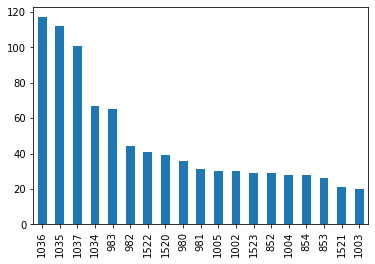

In [39]:
df["LojaID"].value_counts(ascending=False).plot.bar();

<AxesSubplot:>

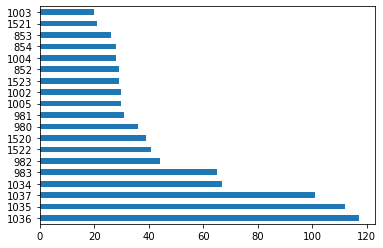

In [40]:
df["LojaID"].value_counts().plot.barh()

<AxesSubplot:ylabel='Receita'>

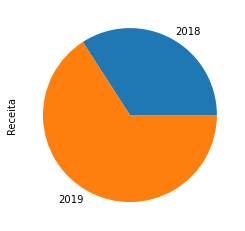

In [41]:
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie()

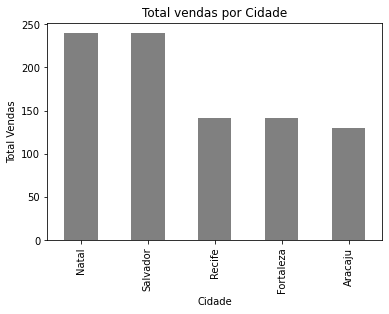

In [42]:
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total vendas por Cidade",color="grey")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

In [43]:
plt.style.use("ggplot")

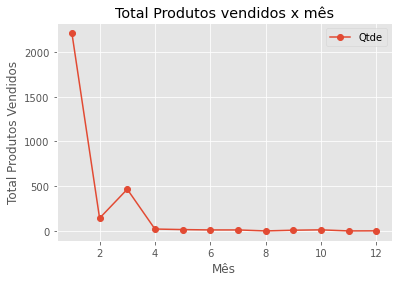

In [44]:
df.groupby(df["mes_venda"])["Qtde"].sum().plot(title = "Total Produtos vendidos x mês", marker = "o")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend();

In [50]:
df["Ano_Venda"] = df["Data"].dt.year

In [51]:
df_2019 = df[df["Ano_Venda"] == 2019]

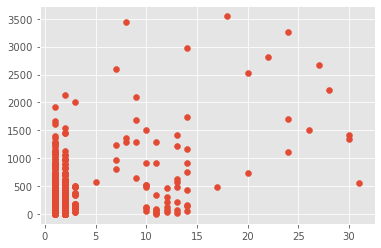

In [52]:
plt.scatter(x=df_2019["dia_venda"], y = df_2019["Receita"]);

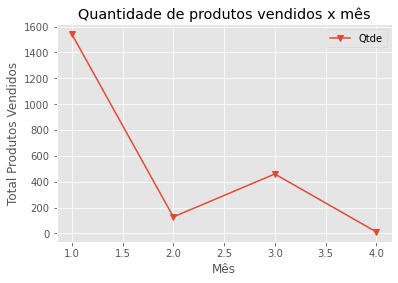

In [53]:
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "v")
plt.title("Quantidade de produtos vendidos x mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos");
plt.legend()
plt.savefig("grafico QTDE x MES.png")